<a href="https://colab.research.google.com/github/BachokunIAR/Battery/blob/main/RUL_analysis_of_Battery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tqdm

In [ ]:
#importing data

#files  = files.upload()


In [ ]:
!ls

drive  sample_data


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/NASA_Battery_data/metadata.csv")
data

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,[2010. 9. 30. 7. 36. ...,24,B0055,247,7561,07561.csv,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,[2010. 9. 30. 8. 8. ...,4,B0055,248,7562,07562.csv,1.0201379996149256,NaN,NaN
7562,charge,[2010. 9. 30. 8. 48. 54.25],4,B0055,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,[2010. 9. 30. 11. 50. ...,4,B0055,250,7564,07564.csv,0.9907591663373165,NaN,NaN


In [ ]:
data.shape

(7565, 10)

In [ ]:
charge_df = pd.DataFrame()
discharge_df = pd.DataFrame()

folder_path = '/content/drive/MyDrive/NASA_Battery_data/data'

for index, row in tqdm.tqdm(data.iterrows()):
    file_name = row['filename']
    battery_id = row['battery_id']
    file_path = os.path.join(folder_path, file_name)
    file_df = pd.read_csv(file_path)

    file_df['battery_id'] = battery_id

    if row['type'] == 'charge': # this part will exract all charge rows
    #and concateneta them to form one big dischare file
        charge_df = pd.concat([charge_df, file_df], ignore_index=True)
    elif row['type'] == 'discharge': # all charge rows and concatenate
        discharge_df = pd.concat([discharge_df, file_df], ignore_index=True)

print("\nCharge DataFrame:")
print(charge_df.head())

print("\ndischarge DataFrame:")
print(discharge_df.head())

7565it [05:31, 22.81it/s]


Charge DataFrame:
   Voltage_measured  Current_measured  Temperature_measured  Current_charge  \
0          3.486189          0.001417              5.990142         -0.0006   
1          3.746592          1.489057              5.992528          1.4995   
2          3.775438          1.490426              5.991340          1.4995   
3          3.794844          1.491527              6.003554          1.4995   
4          3.811691          1.491425              6.026729          1.4995   

   Voltage_charge    Time battery_id  
0           0.002   0.000      B0047  
1           4.618   2.594      B0047  
2           4.669   8.922      B0047  
3           4.694  15.234      B0047  
4           4.707  21.516      B0047  

discharge DataFrame:
   Voltage_measured  Current_measured  Temperature_measured  Current_load  \
0          4.246711          0.000252              6.212696        0.0002   
1          4.246764         -0.001411              6.234019        0.0002   
2          4.039277

In [ ]:
file_df.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,4.201539,0.375570,6.195426,0.377618,4.427388,5369.834574
std,0.037572,0.460969,1.240094,0.463363,0.261541,3137.320816
min,3.742571,0.001106,3.642772,-0.000600,0.002000,0.000000
25%,4.210020,0.059897,5.484738,0.061000,4.263000,2649.211250
50%,4.211198,0.152085,6.112735,0.152600,4.314000,5366.484500
75%,4.212532,0.474849,6.609027,0.477850,4.491000,8084.590250
max,4.214610,1.493619,11.838381,1.499500,5.011000,10803.422000


In [ ]:
#
def plot_data(file_df, profile="charge"):

    if profile=='charge':
        plt.figure(figsize=(10,4))
        plt.plot(file_df.Time, file_df.Voltage_measured, 'b', label='Voltage_measured')
        plt.plot(file_df.Time, file_df.Current_measured, 'r', label='Current_measured')
        plt.ylabel("Voltage")
        plt.legend()
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(file_df.Time, file_df.Temperature_measured, 'k', label='Temperature_measured')
        plt.ylabel("Temperature")
        plt.xlabel("Time(s)")
        plt.legend()
        plt.show()


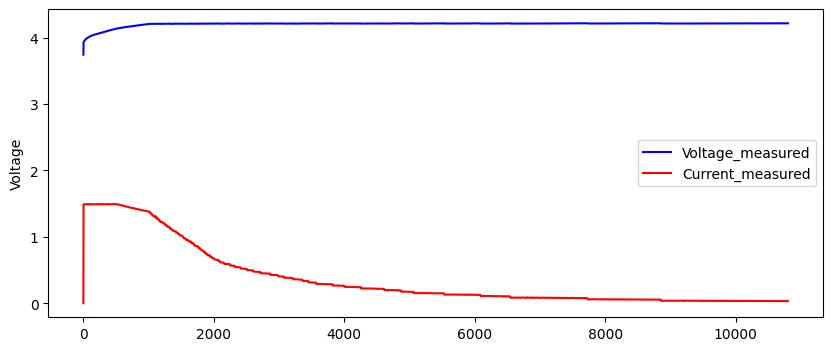

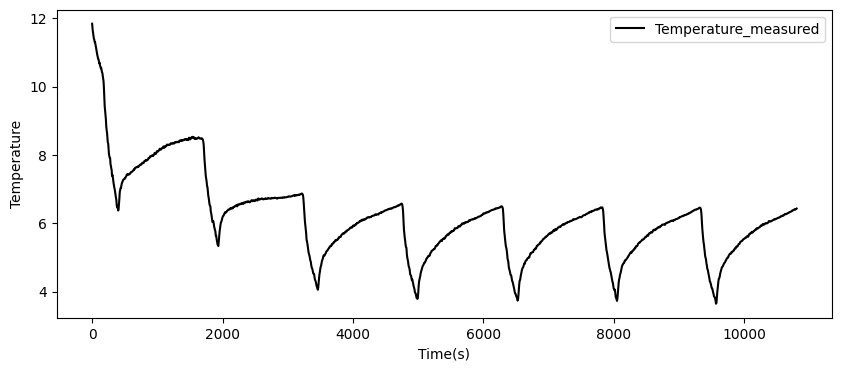

In [ ]:
plot_data(file_df)

In [ ]:
def plot_data_dis(file_df, profile="discharge"):

    if profile=='discharge':
        plt.figure(figsize=(10,4))
        plt.plot(file_df.Time, file_df.Voltage_measured, 'b', label='Voltage_measured')
        plt.plot(file_df.Time, file_df.Current_measured, 'r', label='Current_measured')
        plt.ylabel("Voltage")
        plt.legend()
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(file_df.Time, file_df.Temperature_measured, 'k', label='Temperature_measured')
        plt.ylabel("Temperature")
        plt.xlabel("Time(s)")
        plt.legend()
        plt.show()

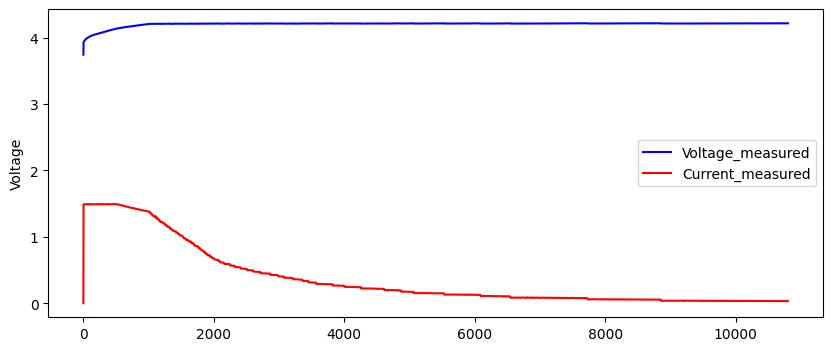

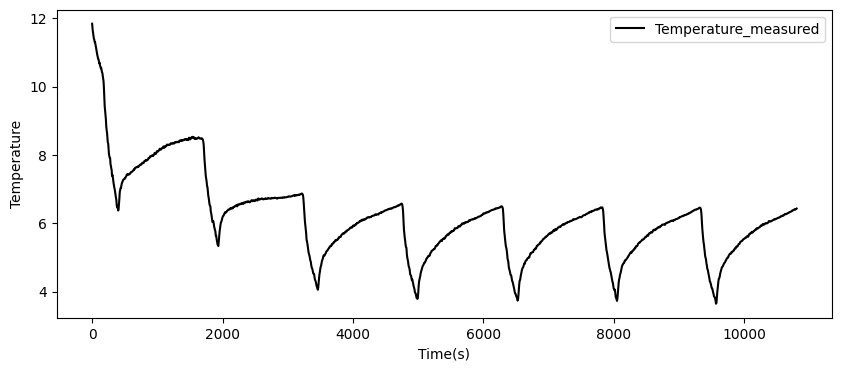

In [ ]:
plot_data_dis(file_df)

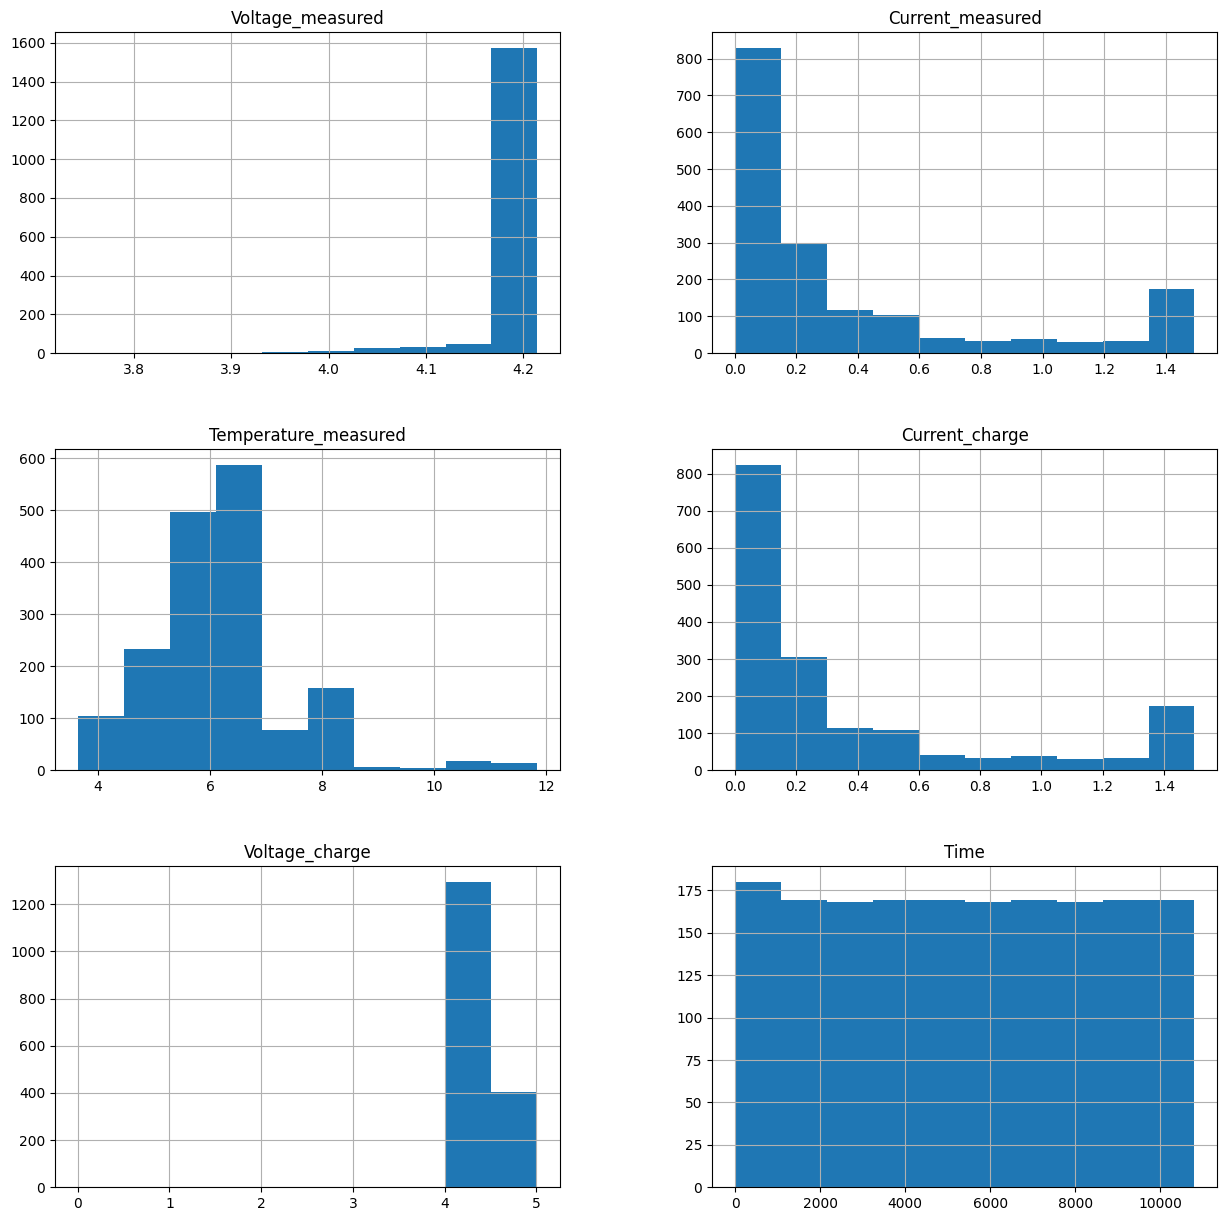

In [ ]:
plt.rcParams["figure.figsize"]=[15,15]
file_df.hist();

In [ ]:
discharge_df.shape

(770070, 7)

In [ ]:
charge_df.shape

(6512876, 7)

In [ ]:
discharge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770070 entries, 0 to 770069
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Voltage_measured      770070 non-null  float64
 1   Current_measured      770070 non-null  float64
 2   Temperature_measured  770070 non-null  float64
 3   Current_load          770070 non-null  float64
 4   Voltage_load          770070 non-null  float64
 5   Time                  770070 non-null  float64
 6   battery_id            770070 non-null  object 
dtypes: float64(6), object(1)
memory usage: 41.1+ MB


In [ ]:
discharge_df.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
count,770070.000000,770070.000000,770070.000000,770070.000000,770070.000000,770070.000000
mean,3.417351,-1.578464,27.281331,1.487260,2.015373,1883.618060
std,0.419136,1.161964,14.062328,1.268142,1.134413,1390.592695
min,0.192738,-4.038796,2.904756,-2.000000,0.000000,0.000000
25%,3.282026,-2.010765,11.462661,0.998000,1.304000,795.047000
50%,3.473762,-1.989172,30.083127,1.998000,2.431000,1639.781000
75%,3.664314,-0.995509,36.023366,1.999000,2.776000,2620.781000
max,4.542427,0.030461,69.869746,4.148800,97.000000,6574.671000


In [ ]:
charge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512876 entries, 0 to 6512875
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Voltage_measured      float64
 1   Current_measured      float64
 2   Temperature_measured  float64
 3   Current_charge        float64
 4   Voltage_charge        float64
 5   Time                  float64
 6   battery_id            object 
dtypes: float64(6), object(1)
memory usage: 347.8+ MB


In [ ]:
charge_df.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
count,6.512619e+06,6.512619e+06,6.512619e+06,6.512876e+06,6.512876e+06,6.512876e+06
mean,4.120782e+00,5.090099e-01,2.160958e+01,5.085691e-01,4.058925e+00,5.156888e+03
std,4.184828e-01,5.789989e-01,1.201756e+01,5.778422e-01,1.296906e+00,3.097868e+03
min,-1.422157e-03,-4.508828e+00,2.852221e+00,-4.513000e+00,-1.000000e-02,0.000000e+00
25%,4.187800e+00,5.948199e-02,6.886660e+00,6.000000e-02,4.246000e+00,2.423109e+03
50%,4.198389e+00,1.989556e-01,2.453953e+01,2.000000e-01,4.314000e+00,5.099625e+03
75%,4.205650e+00,9.891576e-01,2.705159e+01,9.870000e-01,4.643000e+00,7.825687e+03
max,8.393141e+00,1.536047e+00,6.848251e+01,1.507000e+00,5.011000e+00,1.081880e+04


Correlation between the features of the Battery

In [ ]:
file_df.head(10)

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,battery_id
0,3.742571,0.001106,11.838381,-0.0006,0.002,0.000,B0055
1,3.925105,1.491764,11.780438,1.4995,4.808,2.579,B0055
2,3.940043,1.491915,11.652214,1.4995,4.821,8.610,B0055
3,3.949894,1.491505,11.570002,1.4995,4.834,14.547,B0055
4,3.957889,1.492496,11.472317,1.4995,4.834,20.500,B0055
5,3.964332,1.491082,11.404595,1.4995,4.846,26.438,B0055
6,3.970631,1.491254,11.376115,1.4995,4.846,32.375,B0055
7,3.976039,1.492315,11.301120,1.4995,4.846,38.329,B0055
8,3.981243,1.491091,11.300609,1.4995,4.859,44.297,B0055
9,3.985857,1.493073,11.244318,1.4995,4.859,50.235,B0055


In [ ]:
file_df.tail(10)

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,battery_id
1688,4.213998,0.035713,6.374095,0.0348,4.25,10744.985,B0055
1689,4.214056,0.034961,6.380405,0.0354,4.25,10751.391,B0055
1690,4.214121,0.034942,6.387030,0.0348,4.25,10757.797,B0055
1691,4.214123,0.035265,6.398559,0.0348,4.25,10764.188,B0055
1692,4.213934,0.033669,6.404039,0.0348,4.25,10770.579,B0055
1693,4.214016,0.034080,6.398011,0.0348,4.25,10777.672,B0055
1694,4.213823,0.034787,6.412317,0.0348,4.25,10784.047,B0055
1695,4.214100,0.034863,6.407888,0.0348,4.25,10790.547,B0055
1696,4.213995,0.032502,6.417216,0.0348,4.25,10796.969,B0055
1697,4.214086,0.035222,6.428595,0.0348,4.25,10803.422,B0055


# <font color =red> Splitting data into Train, validation, test datasets </font>

#<font color = red> Model Training

In [ ]:
x = file_df.drop(['Temperature_measured','battery_id'],axis=1)
y = file_df.Temperature_measured

In [ ]:
x.head()

,Voltage_measured,Current_measured,Current_charge,Voltage_charge,Time
0,3.742571,0.001106,-0.0006,0.002,0.000
1,3.925105,1.491764,1.4995,4.808,2.579
2,3.940043,1.491915,1.4995,4.821,8.610
3,3.949894,1.491505,1.4995,4.834,14.547
4,3.957889,1.492496,1.4995,4.834,20.500


In [ ]:
y.head()

0    11.838381
1    11.780438
2    11.652214
3    11.570002
4    11.472317
Name: Temperature_measured, dtype: float64

#<font color =red>  Remaining Useful life (RUL) of Battery

In [ ]:
data_RUL = "/content/drive/MyDrive/NASA_Battery_data/Battery_RUL.csv"
data_RUL = pd.read_csv(data_RUL)
data_RUL.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


* # Spliting data in train, test

In [ ]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
x = data_RUL.drop("RUL",axis =1)
y = data_RUL.RUL

In [ ]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y,
                                               test_size = 0.3,
                                               random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Create a decision tree regressor model
dtree = DecisionTreeRegressor()
dtree.fit(xtrain,ytrain.ravel())

#the hyperparameter; these parameters can be change to suit a problem
param_grid = [
    {'max_depth': [3, 5, 10],
     'max_features': [3, 4, 5]}
]

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,  cv=5,
                           scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(xtrain, ytrain)
model = grid_search.best_estimator_
ypred = model.predict(xtest)

# Evaluate the performance of the best model
ms_error = mean_squared_error(ytest, ypred)
print("Mean Squared Error on Test Set: ", ms_error)

train_score = model.score(xtrain, ytrain)
print("Score on Training Set: {:.3%}".format(train_score))

# Calculate and print the R^2 score on the test set
test_score = model.score(xtrain, ytrain)
print("Score on Test Set: {:.3%}".format(test_score))

Mean Squared Error on Test Set:  102.97699161414363
Score on Training Set: 99.968%
Score on Test Set: 99.968%


# <font color = red> Testing the Model

In [ ]:
input_data = (3.0,7393.76	,1112.992000,4.249,3.224,	5508.993,6762.02,10420.38)
input_data_np = np.asarray(input_data)
input_data_re = input_data_np.reshape(1,-1)
pred = dtree.predict(input_data_re)

print('The RUL of the battery is:',pred);


The RUL of the battery is: [1110.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
